<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Data_Wrangling_101_Pandas_in_Action/Data_Wrangling_101_Pandas_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling 101: Pandas in Action

In this workshop, we will be working with a small penguin data set to practice fundamental Pandas functions.

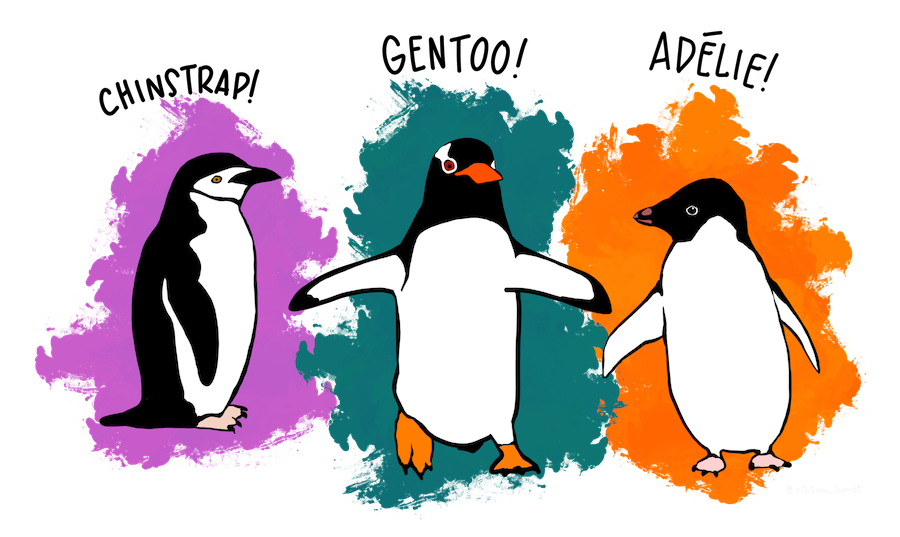

# Why use Pandas?

Pandas is a Python library that provides data structures and methods for data manipulation and analysis, specifically data in the form of numerical tables and time series.

# Import the pandas library

In order to use `pandas`, we have to import the module using an `import` statement.

To learn more about the import statement, see: https://docs.python.org/3/reference/import.html

In [380]:
import pandas as pd
pd.__version__

'1.5.3'

For the rest of the notebook, we can access the `pandas` libary through the *alias* `pd`.

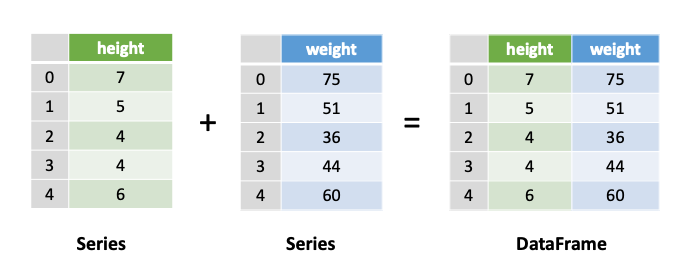

# Basic Series properties

The Pandas Series data type is a one-dimensional array of indexed data. These can be created from Python lists:

In [381]:
data = pd.Series([0.25, 0.5, 0.75])
data

0    0.25
1    0.50
2    0.75
dtype: float64

In [382]:
data.values

array([0.25, 0.5 , 0.75])

Similarly to Python lists, these can be accessed by index using the square bracket notation:

In [383]:
data[1]

0.5

You can explicitly create the index for every value in the Series, using values of any type. Then the data can be accessed using that index, similarly to how you access values in Python dictionaries.

In [384]:
data = pd.Series([.25, .5, .75, 1], index=[2,4,6,8])
data

2    0.25
4    0.50
6    0.75
8    1.00
dtype: float64

In [385]:
data[2]

0.25

In [386]:
data = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [387]:
data['a':'c']

a    1
b    2
c    3
dtype: int64

All of the indices can be retrieved using the `index` attribute.

In [388]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

# Read tabular data

Normally rather than creating the data by hand in a Python program, it will already exist in some other format. Pandas can read a wide variety of formats.

For instance, the `read_csv()` method creates a DataFrame from a .csv (Comma-Separated Value) file (where the data is separated by commas and new lines). This method can accept both a path to a local file or a URL.

`pandas` can also read from other file formats, including Excel, JSON, HDF5, SQL.... To learn more, see the docs:

https://pandas.pydata.org/docs/user_guide/io.html

In [389]:
url = 'https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv'
df = pd.read_csv(url)

- *head()* shows the first 5 rows of a dataframe by default
- *tail()* shows the last 5 rows of a dataframe by default
  - We can override this behavior by providing an argument with the number of rows we want to see
- the leftmost number is the row number in the dataframe
  - **remember, Python indexes from 0**

In [390]:
print(df.head())
print(df.tail(3))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
341  Gentoo  Biscoe              50.4             15.7              222.0   
342  Gentoo  Biscoe              45.2             14.8              212.0   
343  Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
341       5750.0    MALE  
342       5200.0  

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


*info()* returns summary information about the csv file we read.

We can see that there are 7 columns, and 344 rows. Of the columns, 4 contain floating point values, and 3 contain strings.

Notice that the non-null count is not the same for all of the columns. This means that some of the rows do not have a value for that column, and we will want to deal with this later.



# Basic DataFrame properties

In [392]:
rows = df.shape[0]
cols = df.shape[1]

print(f'{df.shape} --> {rows} rows and {cols} columns')

(344, 7) --> 344 rows and 7 columns


The *shape* property returns a tuple which tells us that our data has 344 columns and 7 rows.

[ For more information on tuples, see: https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences ]

We can extract a list of the column names like so:

In [393]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Selecting subsets of dataframes


### Selecting by column

We can select a single column of our DataFrame by name:

In [394]:
df[['species']]

species
0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
..      ...
339  Gentoo
340  Gentoo
341  Gentoo
342  Gentoo
343  Gentoo

[344 rows x 1 columns]

We can select a subset with multiple columns:

In [395]:
df[['species', 'flipper_length_mm', 'body_mass_g']]

species  flipper_length_mm  body_mass_g
0    Adelie              181.0       3750.0
1    Adelie              186.0       3800.0
2    Adelie              195.0       3250.0
3    Adelie                NaN          NaN
4    Adelie              193.0       3450.0
..      ...                ...          ...
339  Gentoo                NaN          NaN
340  Gentoo              215.0       4850.0
341  Gentoo              222.0       5750.0
342  Gentoo              212.0       5200.0
343  Gentoo              213.0       5400.0

[344 rows x 3 columns]

## Selecting by index

*iloc[ ]* provides integer-location based indexing for selection by position.

In [396]:
df.iloc[0] # selects the row at index 0

species                 Adelie
island               Torgersen
culmen_length_mm          39.1
culmen_depth_mm           18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

*iloc[ ]* also support the slicing operation, so we can specify a specific range of rows from a DataFrame. As with Python slicing, the last index is excluded from the slice.

In [397]:
df.iloc[5:10] # selects rows 5 through 9

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   
7  Adelie  Torgersen              39.2             19.6              195.0   
8  Adelie  Torgersen              34.1             18.1              193.0   
9  Adelie  Torgersen              42.0             20.2              190.0   

   body_mass_g     sex  
5       3650.0    MALE  
6       3625.0  FEMALE  
7       4675.0    MALE  
8       3475.0     NaN  
9       4250.0     NaN

#### Exercise
Try selecting rows 5 through 9, columns 1 and 2.

In [398]:
# your code here


##### Solution

In [399]:
df.iloc[5:10, 1:3] # selects rows 5 through 9, columns 1 and 2

island  culmen_length_mm
5  Torgersen              39.3
6  Torgersen              38.9
7  Torgersen              39.2
8  Torgersen              34.1
9  Torgersen              42.0

## Selecting by condition

We can also filter our data based on conditions.

This generally takes the form:

```
df[condition]
```

The condition is an expression that creates a Series of Boolean values. When used to index into a DataFrame, only the rows where the Boolean is True are returned. (This is referred to as a *mask*)

For example, let's pick only female penguins:

In [400]:
# example condition
df['sex'] == 'FEMALE'

0      False
1       True
2       True
3      False
4       True
       ...  
339    False
340     True
341    False
342     True
343    False
Name: sex, Length: 344, dtype: bool

In [401]:
df[df['sex'] == 'FEMALE']

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
6    Adelie  Torgersen              38.9             17.8              181.0   
12   Adelie  Torgersen              41.1             17.6              182.0   
..      ...        ...               ...              ...                ...   
332  Gentoo     Biscoe              43.5             15.2              213.0   
334  Gentoo     Biscoe              46.2             14.1              217.0   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   

     body_mass_g     sex  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
6         3625.0  FEMALE  
12        3200.0  FEMALE  
..           ...     ...  
332       4650.0  FEMALE  
334       4375.0  FEMALE  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
342       5200.0  FEMALE  

[165 rows x 7 columns]

Or only penguins with a flipper length above 200 mm:

In [402]:
df[df['flipper_length_mm'] > 200]

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
90   Adelie      Dream              35.7             18.0              202.0   
91   Adelie      Dream              41.1             18.1              205.0   
95   Adelie      Dream              40.8             18.9              208.0   
101  Adelie     Biscoe              41.0             20.0              203.0   
123  Adelie  Torgersen              41.4             18.5              202.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
90        3550.0  FEMALE  
91        4300.0    MALE  
95        4300.0    MALE  
101       4725.0    MALE  
123       3875.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[148 rows x 7 columns]

We can combine multiple conditions:

In [403]:
df[(df['flipper_length_mm'] > 200) & (df['island'] == 'Torgersen')]

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
123  Adelie  Torgersen              41.4             18.5              202.0   
129  Adelie  Torgersen              44.1             18.0              210.0   

     body_mass_g   sex  
123       3875.0  MALE  
129       4000.0  MALE

And also combine the various ways of selecting data. Here, we select only two columns where this condition is true.

In [404]:
df[['species', 'body_mass_g']][(df['flipper_length_mm'] > 200) & (df['island'] == 'Torgersen')]

species  body_mass_g
123  Adelie       3875.0
129  Adelie       4000.0

#### Exercise
Try finding the number of penguins with a flipper length above 200 mm.

In [405]:
# your code here


##### Solution

In [406]:
df[df['flipper_length_mm'] > 200].shape[0]

148

# Manipulating DataFrames

## Deriving new columns from existing columns

### Deriving from a single column

We can 'derive' a new column from another column, for example performing a unit conversion. This process would perform a manipulation on the data in a given column, and save the results to a new column:

In [407]:
df['culmen_length_in'] = 0.039 * df['culmen_length_mm'] # creates a new column
df['culmen_length_in'] = round(df['culmen_length_in'], 1) # simply rounds the value to 1 decimal point
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  culmen_length_in  
0       3750.0    MALE               1.5  
1       3800.0  FEMALE               1.5  
2       3250.0  FEMALE               1.6  
3          NaN     NaN               NaN  
4       3450.0  FEMALE               1.4

A column with the name 'culmen_length_in' is created with the new data.

#### A side note: optimizing your code

If you don't have much practice using pandas, it may be easy to fall back on familiar habits and patterns. It's common to use for loops to iterate through items in a Python list, and for loops can also be used to iterate through the rows in a DataFrame. However, Pandas is built to speed up these types of operations.

[Further examples here](https://medium.com/@tommerrissin/is-pandas-really-that-slow-cff4352e4f58)



In [408]:
from time import time

df1 = df.copy()
df2 = df.copy()

# 'vectorized' operation
start_1 = time()
df1['culmen_length_in'] = 0.039 * df1['culmen_length_mm']
run_time_1 = time() - start_1

# for loop
start_2 = time()
for i in df.index:
  df2.loc[i, 'culmen_length_in'] = df2.loc[i, 'culmen_length_mm']
run_time_2 = time() - start_2

print(f'vectorized: {run_time_1:.5f}')
print(f'for loop: {run_time_2:.5f}')
print(f'for loop takes {run_time_2/run_time_1:.2f}x as long!')

vectorized: 0.00108
for loop: 0.09986
for loop takes 92.21x as long!


### Deriving from multiple columns

We can also derive a new column based on multiple other columns. For example, let's calculate the ratio of culmen length to culmen depth.

In [409]:
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']
df['culmen_ratio'] = round(df['culmen_ratio'], 1)
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  culmen_length_in  culmen_ratio  
0       3750.0    MALE               1.5           2.1  
1       3800.0  FEMALE               1.5           2.3  
2       3250.0  FEMALE               1.6           2.2  
3          NaN     NaN               NaN           NaN  
4       3450.0  FEMALE               1.4           1.9

### Dropping columns

Let's try to drop the two columns we created in the DataFrame.

In [410]:
df.drop(['species', 'island'], axis=1)
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  culmen_length_in  culmen_ratio  
0       3750.0    MALE               1.5           2.1  
1       3800.0  FEMALE               1.5           2.3  
2       3250.0  FEMALE               1.6           2.2  
3          NaN     NaN               NaN           NaN  
4       3450.0  FEMALE               1.4           1.9

What happened? The *drop()* method returns a new DataFrame without the dropped columns, but our *df* variable contains the old DataFrame. We can either overwrite our variable *df* with the new DataFrame, or we can use the *inplace* argument to specify that the rows should be dropped from our DataFrame.

In [411]:
# overwrite df variable with new DataFrame
df = df.drop(['species', 'island'], axis=1)
df.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
3               NaN              NaN                NaN          NaN     NaN   
4              36.7             19.3              193.0       3450.0  FEMALE   

   culmen_length_in  culmen_ratio  
0               1.5           2.1  
1               1.5           2.3  
2               1.6           2.2  
3               NaN           NaN  
4               1.4           1.9

In [412]:
# use the inplace argument to specify that the rows should be dropped "in place"
df.drop(['flipper_length_mm'], axis=1, inplace=True)
df.head()

culmen_length_mm  culmen_depth_mm  body_mass_g     sex  culmen_length_in  \
0              39.1             18.7       3750.0    MALE               1.5   
1              39.5             17.4       3800.0  FEMALE               1.5   
2              40.3             18.0       3250.0  FEMALE               1.6   
3               NaN              NaN          NaN     NaN               NaN   
4              36.7             19.3       3450.0  FEMALE               1.4   

   culmen_ratio  
0           2.1  
1           2.3  
2           2.2  
3           NaN  
4           1.9

There is an additional catch to using the *inplace* argument. If we had two variables with the same DataFrame, and we dropped columns in place, then both variables are affected.

In [413]:
new_df = df
df.drop(['culmen_length_mm'], axis=1, inplace=True)
print(df.head())
print(new_df.head())

   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9
   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9


If you want to keep a separate, unchanged version of a DataFrame, simply create a copy. After making a copy, any changes to the original DataFrame will not be reflected in the copy.

In [414]:
new_df = df.copy()
df.drop(['culmen_depth_mm'], axis=1, inplace=True)
print(df.head())
print(new_df.head())

   body_mass_g     sex  culmen_length_in  culmen_ratio
0       3750.0    MALE               1.5           2.1
1       3800.0  FEMALE               1.5           2.3
2       3250.0  FEMALE               1.6           2.2
3          NaN     NaN               NaN           NaN
4       3450.0  FEMALE               1.4           1.9
   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9


### Dropping rows

We can also drop rows, using the *index* argument. Note that all of the comments about copies apply when dropping rows as well.

In [415]:
# drop all rows from 100 to the end of the DataFrame
new_df.drop(index=df.index[100:], axis=0)

culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0              18.7       3750.0    MALE               1.5           2.1
1              17.4       3800.0  FEMALE               1.5           2.3
2              18.0       3250.0  FEMALE               1.6           2.2
3               NaN          NaN     NaN               NaN           NaN
4              19.3       3450.0  FEMALE               1.4           1.9
..              ...          ...     ...               ...           ...
95             18.9       4300.0    MALE               1.6           2.2
96             18.6       3700.0  FEMALE               1.5           2.0
97             18.5       4350.0    MALE               1.6           2.2
98             16.1       2900.0  FEMALE               1.3           2.1
99             18.5       4100.0    MALE               1.7           2.3

[100 rows x 5 columns]

#### Exercise
Or you could drop data based on some other condition. Try dropping all rows of `df` with a body mass greater than 4000 g.

In [416]:
# your code here


##### Solution

In [417]:
df.drop(index=df[df['body_mass_g'] > 4000].index).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 339
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_mass_g       170 non-null    float64
 1   sex               166 non-null    object 
 2   culmen_length_in  170 non-null    float64
 3   culmen_ratio      170 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


# Basic data cleaning

Let's return to the issue we noticed at the start: some of the rows lack values for certain columns. This is a very common issue in real world datasets.



In [418]:
# Let's restart with a fresh copy of our data...
url = 'https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv'
df = pd.read_csv(url)
df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can find the location of null values with the method `isnull()`.

In [419]:
df[df['sex'].isnull()]

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
339          NaN  NaN

NaN, which stands for Not a Number, is a special floating point value recognized by all systems that use the IEEE floating-point representation. If you attempt to perform some arithmetic value using NaN, the result will be NaN.

In [420]:
float('nan') * 1

nan

This behavior extends in a natural way to DataFrames. For instance, deriving a new value from one or more columns with NaN will result in NaN.

In [421]:
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']
df['culmen_ratio'] = round(df['culmen_ratio'], 1)
df[df['culmen_ratio'].isnull()]

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  culmen_ratio  
3            NaN  NaN           NaN  
339          NaN  NaN           NaN

One easy way is to drop all of these rows is to use the *dropna()* method. The following code drops any rows with missing values.

In [422]:
df.dropna(axis=0, inplace=True)
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  culmen_ratio  
0         3750.0    MALE           2.1  
1         3800.0  FEMALE           2.3  
2         3250.0  FEMALE           2.2  
4         3450.0  FEMALE           1.9  
5         3650.0    MALE           1.9  
..           ...     ...           ...  
338       4925.0  FEMALE           3.4  
340       4850.0  FEMALE           3.3  
341       5750.0    MALE           3.2  
342       5200.0  FEMALE           3.1  
343       5400.0    MALE           3.1  

[334 rows x 8 columns]

Other methods for detecting null/nonnull data:

- `isnull()` returns a mask that selects all indices with null vaues.
- `notnull()` returns a mask that selects all indices with nonnull values.
- `dropna()` returns a DataFrame with all null values dropped.
- `fillna()` returns a DataFrame with all null values replaced by some other value, according to the function arguments.

# Calculate summary statistics

Now that we have cleaned up our data, we can calculate and display summary statistics very easily with pandas.

In [423]:
stats = df.describe()
stats

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        334.000000       334.000000         334.000000   334.000000   
mean          43.994311        17.160479         201.014970  4209.056886   
std            5.460521         1.967909          14.022175   804.836129   
min           32.100000        13.100000         172.000000  2700.000000   
25%           39.500000        15.600000         190.000000  3550.000000   
50%           44.500000        17.300000         197.000000  4050.000000   
75%           48.575000        18.700000         213.000000  4793.750000   
max           59.600000        21.500000         231.000000  6300.000000   

       culmen_ratio  
count    334.000000  
mean       2.607485  
std        0.494933  
min        1.600000  
25%        2.200000  
50%        2.600000  
75%        3.100000  
max        3.600000

The *describe()* method returns for each numeric column:
- count: number of data
- mean: arithmetic mean
- std: the standard deviation
- min: the minimum value of the variable
- 25%: first quartile
- 50%: the median value
- 75%: the third quartile
- max: the maximum value of the variable

By default, `describe()` will only include the columns with numeric values.

We can use describe with categorical columns, if we call it on only the categorical columns.

In [424]:
categorical_stats = df[['species', 'island', 'sex']].describe()
categorical_stats

species  island   sex
count      334     334   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       146     164   168

Here, the `describe()` method returns:
- count: a count of the number of NaN entries in the column
- unique: the number of unique values
- top: most frequent
- freq: the frequency of the top value

Because it's a DataFrame, we can access the values with the same methods we have already been using:

In [425]:
stats[['culmen_length_mm']]

culmen_length_mm
count        334.000000
mean          43.994311
std            5.460521
min           32.100000
25%           39.500000
50%           44.500000
75%           48.575000
max           59.600000

# Sorting and grouping data

In [426]:
df.sort_values(by='island') #by default, ascending sort

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
343  Gentoo     Biscoe              49.9             16.1              213.0   
112  Adelie     Biscoe              39.7             17.7              193.0   
113  Adelie     Biscoe              42.2             19.5              197.0   
114  Adelie     Biscoe              39.6             20.7              191.0   
115  Adelie     Biscoe              42.7             18.3              196.0   
..      ...        ...               ...              ...                ...   
72   Adelie  Torgersen              39.6             17.2              196.0   
71   Adelie  Torgersen              39.7             18.4              190.0   
70   Adelie  Torgersen              33.5             19.0              190.0   
68   Adelie  Torgersen              35.9             16.6              190.0   
0    Adelie  Torgersen              39.1             18.7              181.0   

     body_mass_g     sex  culmen_ratio  
343       5400.0    MALE           3.1  
112       3200.0  FEMALE           2.2  
113       4275.0    MALE           2.2  
114       3900.0  FEMALE           1.9  
115       4075.0    MALE           2.3  
..           ...     ...           ...  
72        3550.0  FEMALE           2.3  
71        3900.0    MALE           2.2  
70        3600.0  FEMALE           1.8  
68        3050.0  FEMALE           2.2  
0         3750.0    MALE           2.1  

[334 rows x 8 columns]

In [427]:
df.sort_values(by='flipper_length_mm', ascending=False).head()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
283  Gentoo  Biscoe              54.3             15.7              231.0   
253  Gentoo  Biscoe              59.6             17.0              230.0   
285  Gentoo  Biscoe              49.8             16.8              230.0   
295  Gentoo  Biscoe              48.6             16.0              230.0   
333  Gentoo  Biscoe              51.5             16.3              230.0   

     body_mass_g   sex  culmen_ratio  
283       5650.0  MALE           3.5  
253       6050.0  MALE           3.5  
285       5700.0  MALE           3.0  
295       5800.0  MALE           3.0  
333       5500.0  MALE           3.2

In [440]:
df.groupby('island').head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen              39.1             18.7              181.0   
1   Adelie  Torgersen              39.5             17.4              186.0   
2   Adelie  Torgersen              40.3             18.0              195.0   
4   Adelie  Torgersen              36.7             19.3              193.0   
5   Adelie  Torgersen              39.3             20.6              190.0   
20  Adelie     Biscoe              37.8             18.3              174.0   
21  Adelie     Biscoe              37.7             18.7              180.0   
22  Adelie     Biscoe              35.9             19.2              189.0   
23  Adelie     Biscoe              38.2             18.1              185.0   
24  Adelie     Biscoe              38.8             17.2              180.0   
30  Adelie      Dream              39.5             16.7              178.0   
31  Adelie      Dream              37.2             18.1              178.0   
32  Adelie      Dream              39.5             17.8              188.0   
33  Adelie      Dream              40.9             18.9              184.0   
34  Adelie      Dream              36.4             17.0              195.0   

    body_mass_g     sex  culmen_ratio  
0        3750.0    MALE           2.1  
1        3800.0  FEMALE           2.3  
2        3250.0  FEMALE           2.2  
4        3450.0  FEMALE           1.9  
5        3650.0    MALE           1.9  
20       3400.0  FEMALE           2.1  
21       3600.0    MALE           2.0  
22       3800.0  FEMALE           1.9  
23       3950.0    MALE           2.1  
24       3800.0    MALE           2.3  
30       3250.0  FEMALE           2.4  
31       3900.0    MALE           2.1  
32       3300.0  FEMALE           2.2  
33       3900.0    MALE           2.2  
34       3325.0  FEMALE           2.1

Lets chain together some of our basic operations to make a new table.

In [430]:
males = df[df['sex']=='MALE'].sort_values(by='body_mass_g', ascending=False).head()
females = df[df['sex']=='FEMALE'].sort_values(by='body_mass_g', ascending=False).head()
df_stacked = pd.concat([males, females])

df_stacked

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
237  Gentoo  Biscoe              49.2             15.2              221.0   
253  Gentoo  Biscoe              59.6             17.0              230.0   
297  Gentoo  Biscoe              51.1             16.3              220.0   
337  Gentoo  Biscoe              48.8             16.2              222.0   
299  Gentoo  Biscoe              45.2             16.4              223.0   
342  Gentoo  Biscoe              45.2             14.8              212.0   
293  Gentoo  Biscoe              46.5             14.8              217.0   
254  Gentoo  Biscoe              49.1             14.8              220.0   
268  Gentoo  Biscoe              44.9             13.3              213.0   
252  Gentoo  Biscoe              45.1             14.5              207.0   

     body_mass_g     sex  culmen_ratio  
237       6300.0    MALE           3.2  
253       6050.0    MALE           3.5  
297       6000.0    MALE           3.1  
337       6000.0    MALE           3.0  
299       5950.0    MALE           2.8  
342       5200.0  FEMALE           3.1  
293       5200.0  FEMALE           3.1  
254       5150.0  FEMALE           3.3  
268       5100.0  FEMALE           3.4  
252       5050.0  FEMALE           3.1

In [431]:
df.groupby('island').mean()

<ipython-input-431-2c29e745d5a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('island').mean()


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
island                                                                         
Biscoe            45.243902        15.906098         209.603659  4720.121951   
Dream             44.221951        18.339837         193.186992  3718.902439   
Torgersen         39.038298        18.451064         191.531915  3708.510638   

           culmen_ratio  
island                   
Biscoe         2.892683  
Dream          2.413008  
Torgersen      2.121277

#### Exercise
Sort all female penguins by flipper length.

In [432]:
# your code here


##### Solution

In [433]:
df[df['sex']=='FEMALE'].sort_values(by='body_mass_g')

species     island  culmen_length_mm  culmen_depth_mm  \
190  Chinstrap      Dream              46.9             16.6   
58      Adelie     Biscoe              36.5             16.6   
64      Adelie     Biscoe              36.4             17.1   
116     Adelie  Torgersen              38.6             17.0   
174  Chinstrap      Dream              43.2             16.6   
..         ...        ...               ...              ...   
252     Gentoo     Biscoe              45.1             14.5   
268     Gentoo     Biscoe              44.9             13.3   
254     Gentoo     Biscoe              49.1             14.8   
293     Gentoo     Biscoe              46.5             14.8   
342     Gentoo     Biscoe              45.2             14.8   

     flipper_length_mm  body_mass_g     sex  culmen_ratio  
190              192.0       2700.0  FEMALE           2.8  
58               181.0       2850.0  FEMALE           2.2  
64               184.0       2850.0  FEMALE           2.1  
116              188.0       2900.0  FEMALE           2.3  
174              187.0       2900.0  FEMALE           2.6  
..                 ...          ...     ...           ...  
252              207.0       5050.0  FEMALE           3.1  
268              213.0       5100.0  FEMALE           3.4  
254              220.0       5150.0  FEMALE           3.3  
293              217.0       5200.0  FEMALE           3.1  
342              212.0       5200.0  FEMALE           3.1  

[165 rows x 8 columns]

#### Exercise
Group the female penguins by island and find the descriptive statistics for each population. (hint: use `describe()`)

In [434]:
# your code here


##### Solution

In [435]:
df[df['sex']=='FEMALE'].groupby(by='island').describe()

culmen_length_mm                                                   \
                     count       mean       std   min     25%   50%     75%   
island                                                                        
Biscoe                80.0  43.307500  4.177631  34.5  39.675  44.9  46.500   
Dream                 61.0  42.296721  5.533834  32.1  37.000  42.5  46.400   
Torgersen             24.0  37.554167  2.207887  33.5  35.850  37.6  39.125   

                culmen_depth_mm             ... body_mass_g          \
            max           count       mean  ...         75%     max   
island                                      ...                       
Biscoe     50.5            80.0  15.191250  ...     4812.50  5200.0   
Dream      58.0            61.0  17.601639  ...     3650.00  4150.0   
Torgersen  41.1            24.0  17.550000  ...     3606.25  3800.0   

          culmen_ratio                                               
                 count      mean       std  min  25%  50%  75%  max  
island                                                               
Biscoe            80.0  2.901250  0.509528  1.9  2.3  3.1  3.3  3.5  
Dream             61.0  2.401639  0.318063  1.9  2.1  2.4  2.6  3.3  
Torgersen         24.0  2.150000  0.161515  1.8  2.0  2.2  2.3  2.4  

[3 rows x 40 columns]

# Formatting DataFrames

## Markdown
We can easily format our DataFrame as a Markdown table:

In [436]:
df_stacked.to_markdown(index=False)

'| species   | island   |   culmen_length_mm |   culmen_depth_mm |   flipper_length_mm |   body_mass_g | sex    |   culmen_ratio |\n|:----------|:---------|-------------------:|------------------:|--------------------:|--------------:|:-------|---------------:|\n| Gentoo    | Biscoe   |               49.2 |              15.2 |                 221 |          6300 | MALE   |            3.2 |\n| Gentoo    | Biscoe   |               59.6 |              17   |                 230 |          6050 | MALE   |            3.5 |\n| Gentoo    | Biscoe   |               51.1 |              16.3 |                 220 |          6000 | MALE   |            3.1 |\n| Gentoo    | Biscoe   |               48.8 |              16.2 |                 222 |          6000 | MALE   |            3   |\n| Gentoo    | Biscoe   |               45.2 |              16.4 |                 223 |          5950 | MALE   |            2.8 |\n| Gentoo    | Biscoe   |               45.2 |              14.8 |                 

| species   | island   |   culmen_length_mm |   culmen_depth_mm |   flipper_length_mm |   body_mass_g | sex    |
|:----------|:---------|-------------------:|------------------:|--------------------:|--------------:|:-------|
| Gentoo    | Biscoe   |               49.2 |              15.2 |                 221 |          6300 | MALE   |
| Gentoo    | Biscoe   |               59.6 |              17   |                 230 |          6050 | MALE   |
| Gentoo    | Biscoe   |               51.1 |              16.3 |                 220 |          6000 | MALE   |
| Gentoo    | Biscoe   |               48.8 |              16.2 |                 222 |          6000 | MALE   |
| Gentoo    | Biscoe   |               45.2 |              16.4 |                 223 |          5950 | MALE   |
| Gentoo    | Biscoe   |               45.2 |              14.8 |                 212 |          5200 | FEMALE |
| Gentoo    | Biscoe   |               46.5 |              14.8 |                 217 |          5200 | FEMALE |
| Gentoo    | Biscoe   |               49.1 |              14.8 |                 220 |          5150 | FEMALE |
| Gentoo    | Biscoe   |               44.9 |              13.3 |                 213 |          5100 | FEMALE |
| Gentoo    | Biscoe   |               45.1 |              14.5 |                 207 |          5050 | FEMALE |

## LaTeX
Or as a LaTeX table:

In [437]:
df_stacked.to_latex(index=False)

<ipython-input-437-06bb484af56b>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_stacked.to_latex(index=False)


'\\begin{tabular}{llrrrrlr}\n\\toprule\nspecies & island &  culmen\\_length\\_mm &  culmen\\_depth\\_mm &  flipper\\_length\\_mm &  body\\_mass\\_g &    sex &  culmen\\_ratio \\\\\n\\midrule\n Gentoo & Biscoe &              49.2 &             15.2 &              221.0 &       6300.0 &   MALE &           3.2 \\\\\n Gentoo & Biscoe &              59.6 &             17.0 &              230.0 &       6050.0 &   MALE &           3.5 \\\\\n Gentoo & Biscoe &              51.1 &             16.3 &              220.0 &       6000.0 &   MALE &           3.1 \\\\\n Gentoo & Biscoe &              48.8 &             16.2 &              222.0 &       6000.0 &   MALE &           3.0 \\\\\n Gentoo & Biscoe &              45.2 &             16.4 &              223.0 &       5950.0 &   MALE &           2.8 \\\\\n Gentoo & Biscoe &              45.2 &             14.8 &              212.0 &       5200.0 & FEMALE &           3.1 \\\\\n Gentoo & Biscoe &              46.5 &             14.8 &             

# Exporting data
You can export the DataFrame to many different file formats, see the full list here:

https://pandas.pydata.org/docs/user_guide/io.html

##Excel

Here's an example of how you could save the DataFrame as an Excel file with a file name based on the date:

In [438]:
# needed for the current date
from datetime import date
# needed for writing to Excel
import openpyxl
import xlrd

file_path = f'output-{date.today()}.xlsx'
df_stacked.to_excel(file_path, index=False)